### Looking at speaker demographics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

In [2]:
# Dataframe with american speakers in Quotebank and their information
americans = pd.read_csv("data/americans.csv")

In [3]:
americans.head()

,Unnamed: 0,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,1,['George Walker Bush' 'Bush Jr.' 'Dubya' 'GWB'...,['+1946-07-06T00:00:00Z'],['Q30'],['Q6581097'],1395142029,NaN,NaN,['Q82955' 'Q15982858' 'Q18814623' 'Q1028181' '...,['Q29468'],NaN,Q207,George W. Bush,['Q327959' 'Q464075' 'Q3586276' 'Q4450587'],item,['Q329646' 'Q682443' 'Q33203']
1,2,['Neil Percival Young' 'Shakey' 'Godfather of ...,['+1945-11-12T00:00:00Z'],['Q16' 'Q30'],['Q6581097'],1395459626,NaN,NaN,['Q177220' 'Q488205' 'Q2526255' 'Q639669' 'Q18...,NaN,NaN,Q633,Neil Young,NaN,item,NaN
2,3,['Mary Louise Streep' 'Meryl Louise Streep' 'S...,['+1949-06-22T00:00:00Z'],['Q30'],['Q6581072'],1388232380,NaN,NaN,['Q10800557' 'Q2259451' 'Q10798782' 'Q2405480'...,['Q29552'],NaN,Q873,Meryl Streep,NaN,item,['Q7066']
3,4,NaN,['+1947-10-01T00:00:00Z'],['Q30'],['Q6581097'],1291441158,NaN,NaN,['Q3630699' 'Q54845077'],NaN,NaN,Q1381,Dave Arneson,NaN,item,NaN
4,5,['Ashton James Eaton'],['+1988-01-21T00:00:00Z'],['Q30'],['Q6581097'],1395347414,['Q49085'],NaN,['Q14605941'],NaN,NaN,Q1789,Ashton Eaton,NaN,item,NaN


In [4]:
# Dataframes with quotes
df15_all = pd.read_csv("data/df15_all.csv")
df16_all = pd.read_csv("data/df16_all.csv")
df17_all = pd.read_csv("data/df17_all.csv")
df18_all = pd.read_csv("data/df18_all.csv")
df19_all = pd.read_csv("data/df19_all.csv")
df20_all = pd.read_csv("data/df20_all.csv")

In [5]:
speakers15 = df15_all.speaker
speakers16 = df16_all.speaker
speakers17 = df17_all.speaker
speakers18 = df18_all.speaker
speakers19 = df19_all.speaker
speakers20 = df20_all.speaker

speakers = [speakers15, speakers16, speakers17, speakers18, speakers19, speakers20]

In [6]:
total15 = df15_all.shape[0]
total16 = df16_all.shape[0]
total17 = df17_all.shape[0]
total18 = df18_all.shape[0]
total19 = df19_all.shape[0]
total20 = df20_all.shape[0]

totals = [total15, total16, total17, total18, total19, total20]

In [7]:
years = [2015, 2016, 2017, 2018, 2019, 2020]

### Political Party of Speakers

In [8]:
# Create a dataframe with the counts of each political party QID for each year
pol_party = pd.DataFrame()
for i, s in enumerate(speakers):
    parties = pd.DataFrame(americans[americans.label.isin(s)].party)
    parties.party = parties.party.astype(str)
    parties.party = parties.party.map(lambda x: x.lstrip("['").rstrip("]'"))
    parties.party = parties.party.map(lambda x: x.replace("' '", ' '))
    parties = parties[~(parties.party == 'nan')]
    parties = parties.value_counts().head(10)
    parties = pd.DataFrame(parties).reset_index()
    parties.columns = ['qid', 'ct']
    parties['year'] = i+2015
    pol_party = pol_party.append(parties)
pol_party.head()

,qid,ct,year
0,Q29552,845,2015
1,Q29468,620,2015
2,Q29468 Q29552,18,2015
3,Q29552 Q29468,15,2015
4,Q1937395 Q29552,14,2015


In [9]:
# Create a dataframe with the political party QIDs and their labels
qids = ['Q29552', 'Q29468', 'Q29468 Q29552', 'Q29552 Q29468', 'Q1937395 Q29552',
       'Q5020399', 'Q327591']
labels = ['democrat', 'republican', 'democrat/republican', 'democrat/republican', 'minnesota democrat-farmer-labor', 'democrat', 'independent']

data = list(zip(qids, labels))
party_QID = pd.DataFrame(data, columns = ['qid', 'party'])
party_QID.head()

,qid,party
0,Q29552,democrat
1,Q29468,republican
2,Q29468 Q29552,democrat/republican
3,Q29552 Q29468,democrat/republican
4,Q1937395 Q29552,minnesota democrat-farmer-labor


In [10]:
# Merge the two dataframes to get the labels and the counts together
merged_party = pd.merge(pol_party, party_QID)
merged_party.head()

,qid,ct,year,party
0,Q29552,845,2015,democrat
1,Q29552,660,2016,democrat
2,Q29552,932,2017,democrat
3,Q29552,995,2018,democrat
4,Q29552,849,2019,democrat


#### Comparing the number of quotes about gay rights from democrats and republicans for all years

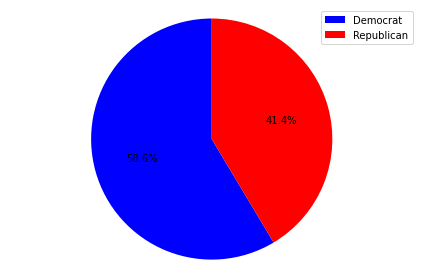

In [11]:
pie_chart = merged_party.drop(['qid', 'year'], axis = 1).groupby('party').sum().sort_values(by = 'ct', ascending=False).head(2)
pie_counts = pie_chart['ct']
pie_labels = pie_chart.index

labels = pie_labels.str.title()
sizes = pie_counts
colors = ['blue', 'red']
patches, texts, junk = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

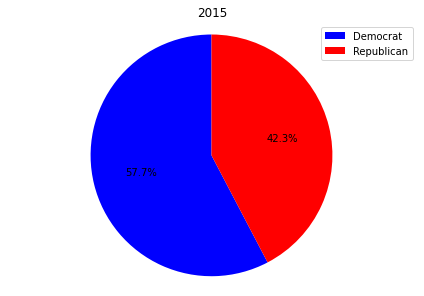

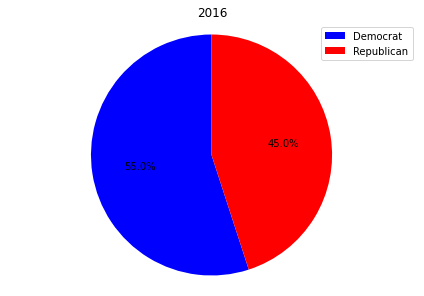

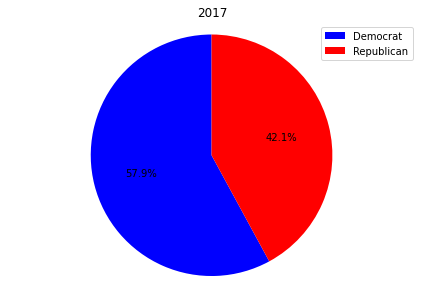

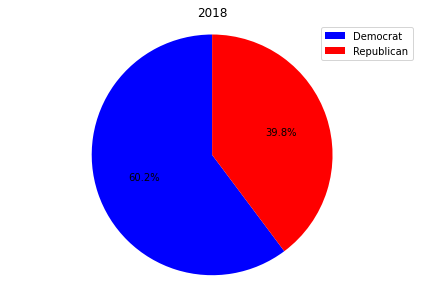

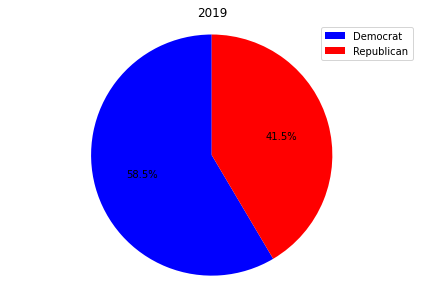

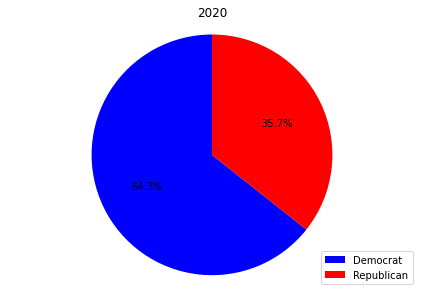

In [12]:
# Looks at each year individually -- not very interesting, the proportion doesn't change much across years
for yr in years:
    piechart = merged_party[(merged_party.year == yr)].head(2)
    pie_counts = piechart.ct
    pie_labels = piechart.party

    labels = pie_labels.str.title()
    sizes = pie_counts
    colors = ['blue', 'red']
    patches, texts, junk = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
    plt.legend(patches, labels, loc="best")
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.tight_layout()
    plt.title(yr)
    plt.show()

### Occupations

In [13]:
# Create a dataframe with the most common occupations of speakers for each year (for quotes related to gay rights)
occs = pd.DataFrame()
for i, s in enumerate(speakers):
    occupations = pd.DataFrame(americans[americans.label.isin(s)].occupation)
    occupations['occupation'] = occupations['occupation'].astype(str)
    occupations['occupation'] = occupations['occupation'].map(lambda x: x.lstrip("['").rstrip("]'"))
    occupations['occupation'] = occupations['occupation'].map(lambda x: x.replace("' '", ' '))
    occupations['occupation'] = occupations['occupation'].map(lambda x: x.replace("'\n '", ' '))
    occupations['occupation'] = occupations['occupation'].map(lambda x: x.split())
    occupations_list = list(itertools.chain(occupations['occupation']))
    occupations_list  = pd.DataFrame([item for sublist in occupations_list for item in sublist], columns = ['qid'])
    occupations_list = occupations_list[~(occupations_list == 'nan')]
    o = occupations_list.value_counts().head(45)
    o = pd.DataFrame(o).reset_index()
    o.columns = ['qid', 'ct']
    o['year'] = i+2015
    occs = occs.append(o)
occs.head()

,qid,ct,year
0,Q82955,1376,2015
1,Q33999,1147,2015
2,Q36180,943,2015
3,Q10798782,873,2015
4,Q10800557,807,2015


In [14]:
# Create a dataframe of the QIDs and labels for occupations
qids = ['Q82955', 'Q33999', 'Q36180', 'Q10798782', 'Q10800557', 'Q1930187',
       'Q19204627', 'Q28389', 'Q177220', 'Q40348', 'Q3282637', 'Q2405480',
       'Q639669', 'Q2526255', 'Q3665646', 'Q578109', 'Q10871364', 'Q2259451',
       'Q36834', 'Q43845', 'Q488205', 'Q6625963', 'Q1622272', 'Q4610556',
       'Q753110', 'Q855091', 'Q183945', 'Q245068', 'Q2722764', 'Q947873',
       'Q482980', 'Q937857', 'Q33231', 'Q131524', 'Q5137571', 'Q49757',
       'Q201788', 'Q37226', 'Q11774891', 'Q8246794', 'Q19509201', 'Q81096', 'Q1028181', 'Q483501', 'Q15077007']
labels = ['politician', 'actor', 'writer', 'actor', 'actor', 'journalist', \
          'american football player', 'screenwriter', 'singer', 'lawyer', 'film producer', 'actor', \
          'musician', 'film director', 'basketball player', 'television producer', 'baseball player', 'actor', \
          'composer', 'businessperson', 'singer', 'novelist', 'professor', 'model', \
          'songwriter', 'guitarist', 'record producer', 'comedian', 'radio personality', 'television presenter', \
          'author', 'football player', 'photographer', 'entrepreneur', 'basketball coach', 'poet', \
          'historian', 'teacher', 'ice hockey player', 'blogger', 'LGBTI rights activist', 'engineer', 'painter', \
          'artist', 'podcaster']
data = list(zip(qids, labels))
occupation_QID = pd.DataFrame(data, columns = ['qid', 'occupation'])
occupation_QID.head()

,qid,occupation
0,Q82955,politician
1,Q33999,actor
2,Q36180,writer
3,Q10798782,actor
4,Q10800557,actor


In [15]:
# Merge the two dataframes
merged_occ = pd.merge(occs, occupation_QID)
merged_occ.head()

,qid,ct,year,occupation
0,Q82955,1376,2015,politician
1,Q82955,1123,2016,politician
2,Q82955,1545,2017,politician
3,Q82955,1559,2018,politician
4,Q82955,1355,2019,politician


In [16]:
merged_occ = merged_occ.drop('qid', axis=1)

Text(0, 0.5, 'Count of Quotations')

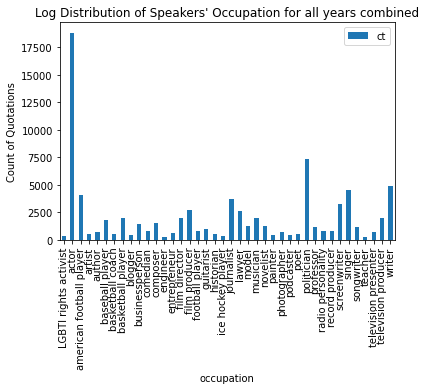

In [17]:
#TODO: make it look nicer ..log?
# Distribution of genders for all years
barchart_all = merged_occ.drop(['year'], axis=1).groupby('occupation').sum().reset_index()
barchart_all.plot.bar(x='occupation', y='ct', rot=90)
plt.title("Log Distribution of Speakers' Occupation for all years combined")
plt.ylabel("Count of Quotations")

In [18]:
top10 = merged_occ.drop(['year'], axis = 1).groupby('occupation').sum().sort_values(by = 'ct', ascending=False).head(10)
other_ct = merged_occ.ct.sum() - top10.ct.sum()
top10.loc['other'] = other_ct
top10

,ct
occupation,
actor,18852
politician,7386
writer,4886
singer,4527
american football player,4107
journalist,3670
screenwriter,3234
film producer,2696
lawyer,2634


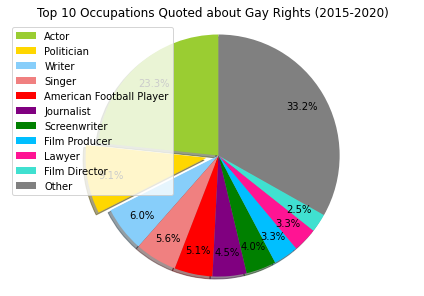

In [19]:
#TODO: too many other, pie chart doesn't look that good
#TODO: colors..., write percentages?
#pie_chart = merged_occ.drop(['year'], axis = 1).groupby('occupation').sum().sort_values(by = 'ct', ascending=False).head(10)
#pie_counts = pie_chart['ct']
#pie_labels = pie_chart.index
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

labels = top10.index.str.title()
sizes = top10.ct
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'purple', 'green', 'deepskyblue', 'deeppink', 'turquoise', 'grey']
patches, texts, junk = plt.pie(sizes, colors=colors, startangle=90, explode=explode, shadow=True, autopct='%1.1f%%', pctdistance=0.8) #autopct='%1.1f%%'
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title("Top 10 Occupations Quoted about Gay Rights (2015-2020)")
plt.show()

In [ ]:
# boring -- don't really change across years, can just show for one year
# also need to group together the different types of actors in one category if we even use these...
for yr in years:
    piechart = merged_occ[(merged_occ.year == yr)].head(10)
    pie_counts = piechart.ct
    pie_labels = piechart.occupation

    labels = pie_labels.str.title()
    sizes = pie_counts
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

### Gender

In [22]:
# Create a dataframe with the gender QIDs and their labels
qids = ['Q6581097', 'Q6581072', 'Q1052281', 'Q48270', 'Q2449503', 'Q1097630', 'Q18116794', \
                           'Q859614', 'Q27679766', 'Q15145779', 'Q12964198', 'Q6581072 Q48270', \
       'Q1097630 Q48270', 'Q6581097 Q18116794', 'Q1052281 Q6581097', 'Q18116794 Q6581097', \
       'Q27679766 Q859614', 'Q15145778', 'Q1984232', 'Q48279', 'Q48279 Q1097630', 'Q505371', \
       'Q48270 Q505371', 'Q189125', 'Q6581097 Q189125', 'Q48270 Q6581072', 'Q48270 Q12964198', \
       'Q1097630 Q48279']
labels = ['male', 'female', 'transgender female', 'non-binary', 'transgender male', \
                           'intersex', 'gender fluid', 'bigender', 'transmasculine', 'cisgender female', \
                           'gender queer', 'female non-binary', 'intersex non-binary', 'gender fluid male', \
         'male transgender female', 'gender fluid male', 'transmasculine bigender', 'cisgender male', 'shemale', 'third gender', \
         'intersex third gender', 'agender', 'non-binary agender', 'transgender person', 'male transgender person', \
         'female non-binary', 'gender queer non-binary', 'intersex third gender']
data = list(zip(qids, labels))
gender_QID = pd.DataFrame(data, columns = ['str_qid', 'gender'])
gender_QID.head()

,str_qid,gender
0,Q6581097,male
1,Q6581072,female
2,Q1052281,transgender female
3,Q48270,non-binary
4,Q2449503,transgender male


In [23]:
# For each year, count the number of quotes per gender, add the year and total number of quotes as other columns
counts_gender = pd.DataFrame()
for i, s in enumerate(speakers):
    counts_tmp = pd.DataFrame(americans[americans.label.isin(s)].gender.value_counts()).reset_index()
    counts_tmp['index'] = counts_tmp['index'].map(lambda x: x.lstrip("['").rstrip("]'"))
    counts_tmp['index'] = counts_tmp['index'].map(lambda x: x.replace("' '", ' '))
    counts_tmp['index'] = counts_tmp['index'].str.split()
    counts_tmp = counts_tmp.rename(columns = {'index': 'qid', 'gender': 'ct'})
    counts_tmp['str_qid'] = counts_tmp['qid'].apply(lambda x: " ".join(x))
    counts_tmp['year'] = years[i]
    counts_tmp['total_quotes'] = totals[i]
    counts_gender = counts_gender.append(counts_tmp)

    counts_gender = counts_gender.drop('qid', axis=1)
counts_gender.head()

,ct,str_qid,year,total_quotes
0,6997,Q6581097,2015,23591
1,2111,Q6581072,2015,23591
2,68,Q1052281,2015,23591
3,22,Q48270,2015,23591
4,20,Q2449503,2015,23591


In [24]:
# Merge the counts and gender dataframes to get the gender labels
merged_gender = pd.merge(counts_gender, gender_QID, on='str_qid')
merged_gender = merged_gender[~merged_gender.gender.isnull()]
merged_gender.head()

,ct,str_qid,year,total_quotes,gender
0,6997,Q6581097,2015,23591,male
1,5318,Q6581097,2016,15092,male
2,7768,Q6581097,2017,27336,male
3,7929,Q6581097,2018,27043,male
4,7123,Q6581097,2019,25926,male


In [25]:
# Look at the counts on a log scale
merged_gender['logcount'] = np.log(merged_gender.ct.astype(float))

In [26]:
# Only look at genders with a positive count
merged_gender_bar = merged_gender[merged_gender.logcount > 0]

#### Distribution of Gender

Text(0, 0.5, 'Log Count of Quotations')

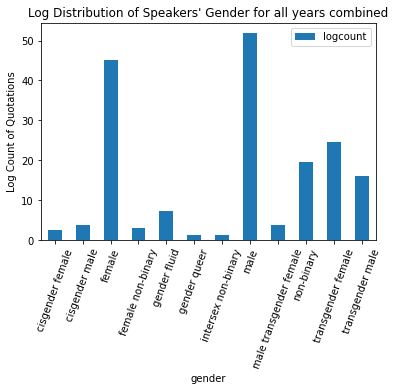

In [27]:
# Distribution of genders for all years
barchart_all = merged_gender_bar.drop(['str_qid', 'total_quotes', 'ct', 'year'], axis=1).groupby('gender').sum().reset_index()
barchart_all.plot.bar(x='gender', y='logcount', rot=70)
plt.title("Log Distribution of Speakers' Gender for all years combined")
plt.ylabel("Log Count of Quotations")

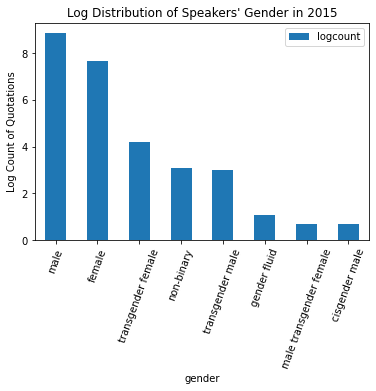

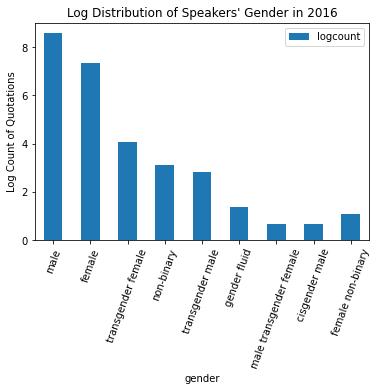

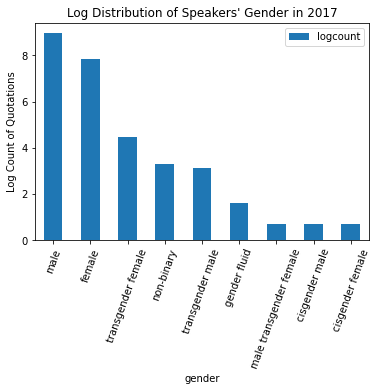

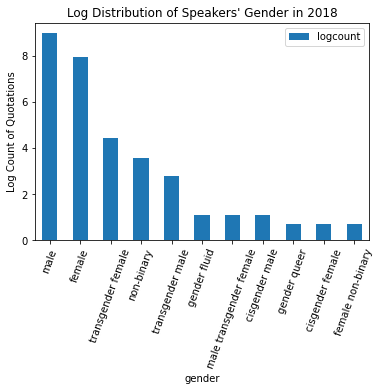

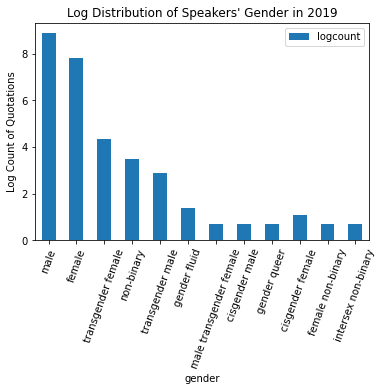

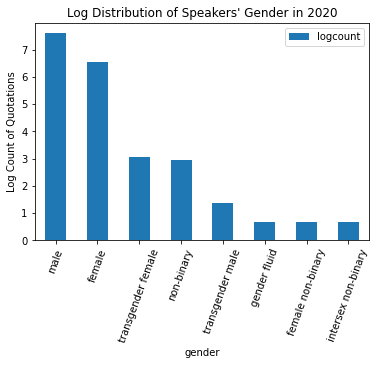

In [28]:
# TODO: change colors, adjust labels, have same labels in the same order on each chart 
for yr in years:
    merged_gender_bar[merged_gender_bar.year == yr].plot.bar(x='gender', y='logcount', rot=70)
    plt.title("Log Distribution of Speakers' Gender in "+ str(yr))
    plt.ylabel("Log Count of Quotations")

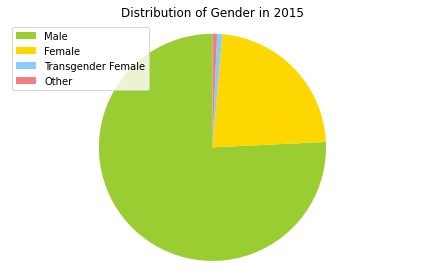

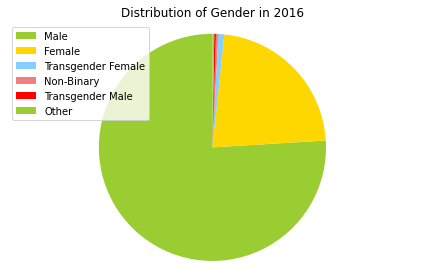

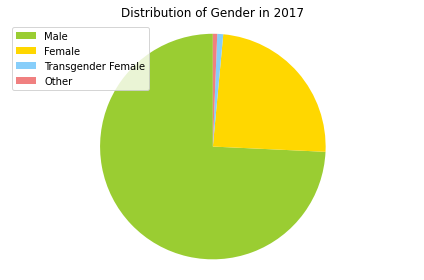

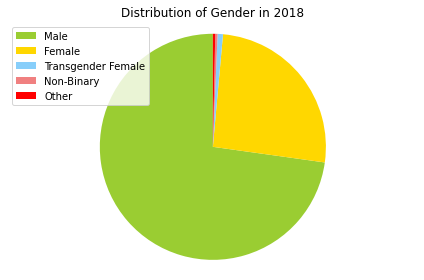

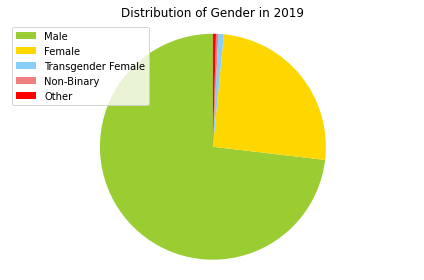

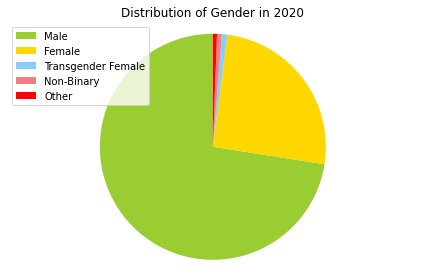

In [29]:
# Pie Charts of Gender by Year (obviously dominated by male and female)
for yr in years:
    piechart = merged_gender[(merged_gender.year == yr) & (merged_gender.ct.astype(float)/merged_gender.total_quotes.astype(float) > 0.001)]
    pie_counts = piechart.ct
    pie_labels = piechart.gender

    pie_counts = pie_counts.append(pd.Series(merged_gender.ct[(merged_gender.year == yr) & ~(merged_gender.ct.astype(float)/merged_gender.total_quotes.astype(float) > 0.001)].sum()))
    pie_labels = pie_labels.append(pd.Series('Other'))

    labels = pie_labels.str.title()
    sizes = pie_counts
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.title("Distribution of Gender in " + str(yr))
    plt.tight_layout()
    plt.show()

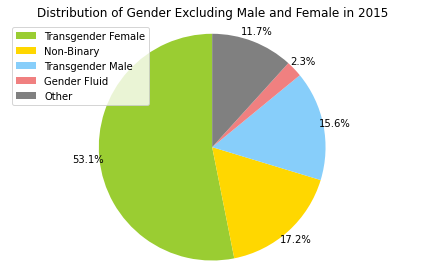

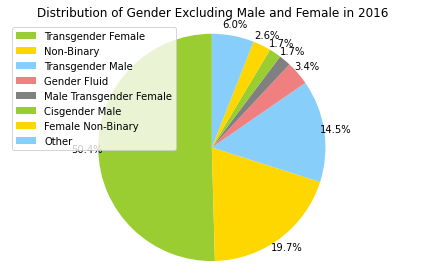

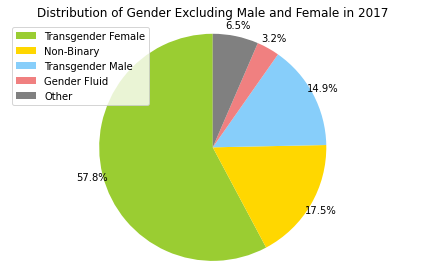

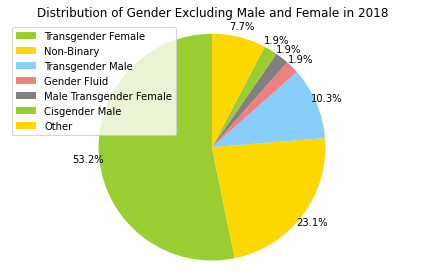

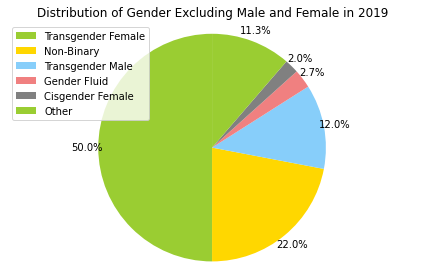

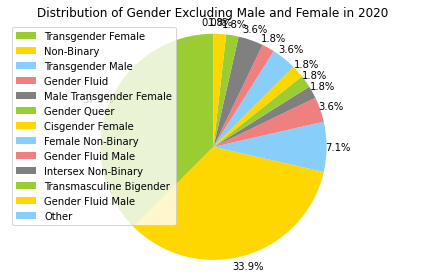

In [30]:
#TODO: make sure colors are consistent, figure out how to associate colors with specific labels
# Look at distribution ignoring male and female
# See significantly more genders in 2020
for yr in years:
    without_mf = merged_gender[(merged_gender.year == yr) & ~(merged_gender.gender.isin(['male', 'female']))]
    piechart = without_mf[without_mf.ct.astype(float)/without_mf.total_quotes.astype(float) > 0.0001]
    other_ct = without_mf.ct.sum() - piechart.ct.sum()
    piechart = piechart.drop(['str_qid', 'year', 'logcount', 'total_quotes'], axis=1).set_index('gender')
    piechart.loc['other'] = other_ct

    labels = piechart.index.str.title()
    sizes = piechart.ct
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'grey']
    patches, texts, junk = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=1.1)
    plt.legend(patches, labels, loc="best")
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.title("Distribution of Gender Excluding Male and Female in " + str(yr))
    plt.tight_layout()
    plt.show()

### Religion

In [31]:
# Create a dataframe with the religion QIDs and their labels
qids = ['Q9592', 'Q9268', 'Q7066', 'Q432', 'Q1841', 'Q5043', 'Q93191', 'Q75809', 'Q33203', 'Q748', 'Q9089', \
       'Q178169', 'Q42504' 'Q682443', 'Q23540', 'Q9268 Q5043', 'Q1622507', 'Q288928', 'Q1351880', 'Q7361618', \
       'Q9592 Q7361618', 'Q6423963', 'Q329646', 'Q483654', 'Q1841 Q7361618', 'Q3333484', 'Q5043 Q9268', 'Q346575', \
       'Q131036', 'Q747802', 'Q13211738', 'Q194253', 'Q217059', 'Q104319', 'Q1062789']
labels = ['catholic', 'jewish', 'atheist', 'muslim', 'catholic', 'christian', 'baptist', 'lutheran', 'methodist', \
         'buddhist', 'hindu', 'presbyterian', 'latter-day saint', 'episcopalian', 'protestant', 'jewish/christian', \
         'unitarian', 'agnostic', 'southern baptist', 'catholic', 'catholic', 'anglican', 'united methodist', \
         'sunni muslim', 'catholic', 'eastern orthodox', 'jewish/christian', 'protestant', 'scientology', 'mormon', \
         'atheist', 'evangelical', 'unificationist', 'seventh-day adventist', 'congregationalist']
data = list(zip(qids, labels))
religion_QID = pd.DataFrame(data, columns = ['str_qid', 'religion'])
religion_QID.head()

,str_qid,religion
0,Q9592,catholic
1,Q9268,jewish
2,Q7066,atheist
3,Q432,muslim
4,Q1841,catholic


In [32]:
# For each year, count the number of quotes per religion, add the year and total number of quotes as other columns
speakers = [speakers15, speakers16, speakers17, speakers20]
years = [2015, 2016, 2017, 2020]
totals = [total15, total16, total17, total20]
counts_rel = pd.DataFrame()
for i, s in enumerate(speakers):
    counts_tmp = pd.DataFrame(americans[americans.label.isin(s)].religion.value_counts()).reset_index()
    counts_tmp['index'] = counts_tmp['index'].map(lambda x: x.lstrip("['").rstrip("]'"))
    counts_tmp['index'] = counts_tmp['index'].map(lambda x: x.replace("' '", ' '))
    counts_tmp['index'] = counts_tmp['index'].str.split()
    counts_tmp = counts_tmp.rename(columns = {'index': 'qid', 'religion': 'ct'})
    counts_tmp['str_qid'] = counts_tmp['qid'].apply(lambda x: " ".join(x))
    counts_tmp['year'] = years[i]
    counts_tmp['total_quotes'] = totals[i]
    counts_rel = counts_rel.append(counts_tmp)

    counts_rel = counts_rel.drop('qid', axis=1)
counts_rel.head()

,ct,str_qid,year,total_quotes
0,113,Q9592,2015,23591
1,91,Q7066,2015,23591
2,90,Q9268,2015,23591
3,57,Q1841,2015,23591
4,48,Q93191,2015,23591


In [33]:
merged_religion = pd.merge(counts_rel, religion_QID, on='str_qid')
merged_religion = merged_religion[~merged_religion.religion.isnull()]
merged_religion.head()

,ct,str_qid,year,total_quotes,religion
0,113,Q9592,2015,23591,catholic
1,74,Q9592,2016,15092,catholic
2,108,Q9592,2017,27336,catholic
3,24,Q9592,2020,5016,catholic
4,91,Q7066,2015,23591,atheist


In [34]:
top10 = merged_religion.drop(['year', 'str_qid', 'total_quotes'], axis = 1).groupby('religion').sum().sort_values(by = 'ct', ascending=False).head(10)
other_ct = merged_religion.ct.sum() - top10.ct.sum()
top10.loc['other'] = other_ct
top10

,ct
religion,
catholic,540
atheist,294
jewish,275
baptist,129
christian,111
muslim,102
presbyterian,81
methodist,78
lutheran,57


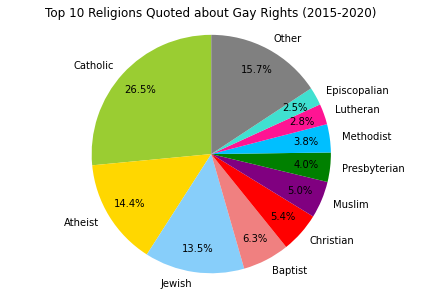

In [35]:
# TODO: normalize with respect to proportion of population belonging to each religion?
#pie_chart = merged_religion.drop(['year', 'str_qid', 'total_quotes'], axis = 1).groupby('religion').sum().sort_values(by = 'ct', ascending=False).head(10)
#pie_counts = pie_chart['ct']
#pie_labels = pie_chart.index

labels = top10.index.str.title()
sizes = top10.ct
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'purple', 'green', 'deepskyblue', 'deeppink', 'turquoise', 'grey']
patches, texts, junk = plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.8, labeldistance = 1.1)


#plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title("Top 10 Religions Quoted about Gay Rights (2015-2020)")
plt.show()

## Topic Modeling

In [1]:
from lda_functions import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meghanharrington/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/meghanharrington/opt/anaconda3/envs/ada/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()



 2015 

[(0,
  '0.024*"right" + 0.023*"marriage" + 0.015*"issue" + 0.012*"gender" + '
  '0.012*"sex" + 0.009*"discrimination" + 0.009*"equality" + 0.009*"law" + '
  '0.008*"state" + 0.008*"support"'),
 (1,
  '0.048*"community" + 0.020*"family" + 0.014*"lesbian" + '
  '0.012*"homosexuality" + 0.011*"human" + 0.009*"live" + 0.007*"member" + '
  '0.006*"movement" + 0.006*"sexual" + 0.006*"choose"'),
 (2,
  '0.024*"woman" + 0.016*"gay" + 0.016*"man" + 0.012*"thing" + 0.011*"time" + '
  '0.011*"love" + 0.011*"way" + 0.010*"feel" + 0.009*"people" + 0.008*"life"')]


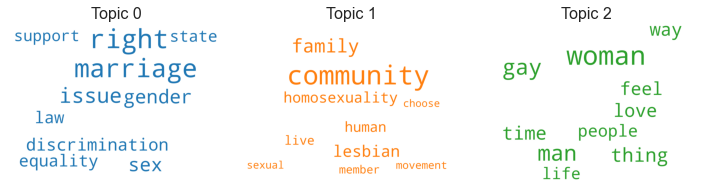


 2016 

[(0,
  '0.015*"right" + 0.014*"law" + 0.013*"discrimination" + 0.012*"community" + '
  '0.012*"state" + 0.011*"student" + 0.011*"identity" + 0.011*"support" + '
  '0.009*"bathroom" + 0.009*"marriage"'),
 (1,
  '0.027*"gender" + 0.015*"issue" + 0.014*"right" + 0.013*"race" + '
  '0.009*"believe" + 0.008*"work" + 0.007*"woman" + 0.006*"change" + '
  '0.006*"care" + 0.005*"way"'),
 (2,
  '0.021*"woman" + 0.015*"gay" + 0.015*"man" + 0.013*"community" + '
  '0.011*"feel" + 0.010*"thing" + 0.010*"life" + 0.009*"people" + 0.008*"love" '
  '+ 0.008*"live"')]


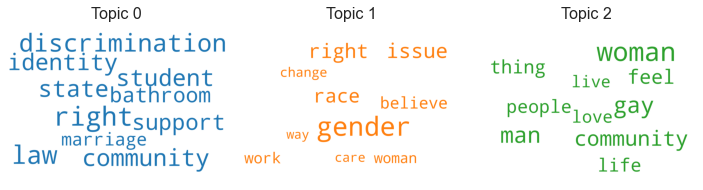


 2017 

[(0,
  '0.026*"gender" + 0.014*"race" + 0.013*"issue" + 0.013*"identity" + '
  '0.012*"need" + 0.011*"sex" + 0.010*"student" + 0.009*"base" + 0.009*"work" '
  '+ 0.007*"change"'),
 (1,
  '0.031*"community" + 0.030*"right" + 0.011*"support" + 0.011*"equality" + '
  '0.011*"military" + 0.011*"discrimination" + 0.010*"country" + 0.009*"serve" '
  '+ 0.009*"marriage" + 0.008*"law"'),
 (2,
  '0.026*"woman" + 0.018*"man" + 0.012*"thing" + 0.011*"life" + 0.011*"time" + '
  '0.010*"way" + 0.010*"gay" + 0.010*"love" + 0.010*"feel" + 0.008*"people"')]


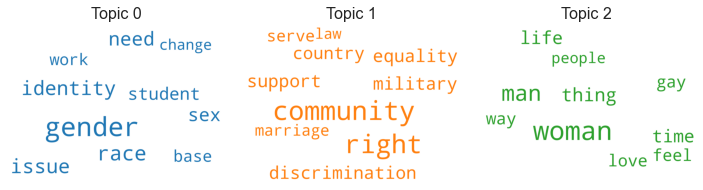


 2018 

[(0,
  '0.016*"man" + 0.015*"gender" + 0.011*"feel" + 0.011*"way" + 0.011*"time" + '
  '0.011*"woman" + 0.011*"thing" + 0.010*"gay" + 0.010*"love" + 0.009*"life"'),
 (1,
  '0.025*"community" + 0.021*"right" + 0.020*"woman" + 0.009*"support" + '
  '0.009*"equality" + 0.009*"work" + 0.008*"issue" + 0.006*"discrimination" + '
  '0.006*"country" + 0.006*"continue"'),
 (2,
  '0.023*"sex" + 0.019*"marriage" + 0.011*"couple" + 0.010*"homosexuality" + '
  '0.009*"person" + 0.007*"homosexual" + 0.006*"church" + 0.005*"night" + '
  '0.005*"single" + 0.005*"call"')]


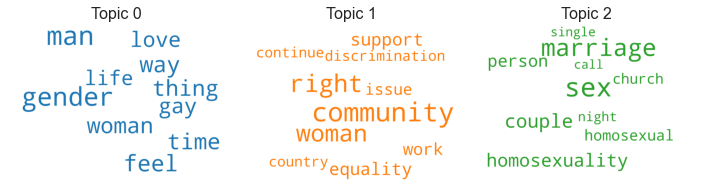


 2019 

[(0,
  '0.019*"man" + 0.017*"woman" + 0.014*"feel" + 0.013*"gay" + 0.013*"time" + '
  '0.012*"love" + 0.012*"thing" + 0.012*"way" + 0.010*"life" + 0.010*"person"'),
 (1,
  '0.019*"child" + 0.018*"story" + 0.016*"different" + 0.011*"sexuality" + '
  '0.010*"gender" + 0.010*"young" + 0.008*"parent" + 0.008*"culture" + '
  '0.008*"film" + 0.007*"artist"'),
 (2,
  '0.024*"community" + 0.013*"right" + 0.013*"gender" + 0.010*"woman" + '
  '0.010*"work" + 0.008*"support" + 0.008*"identity" + 0.007*"need" + '
  '0.007*"equality" + 0.007*"race"')]


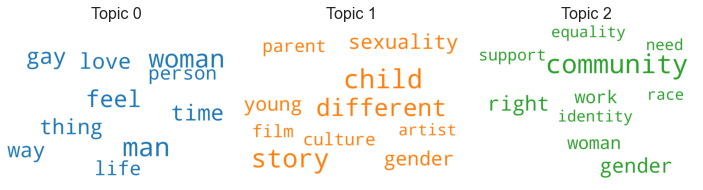


 2020 

[(0,
  '0.015*"community" + 0.012*"look" + 0.011*"woman" + 0.009*"man" + '
  '0.009*"get" + 0.008*"home" + 0.008*"thing" + 0.008*"love" + 0.008*"change" '
  '+ 0.007*"husband"'),
 (1,
  '0.015*"right" + 0.014*"talk" + 0.012*"gender" + 0.010*"woman" + '
  '0.009*"equality" + 0.009*"community" + 0.008*"race" + 0.008*"fight" + '
  '0.006*"identity" + 0.006*"support"'),
 (2,
  '0.014*"woman" + 0.011*"gay" + 0.011*"time" + 0.008*"community" + '
  '0.008*"man" + 0.006*"gender" + 0.005*"person" + 0.005*"black" + '
  '0.005*"year" + 0.005*"world"')]


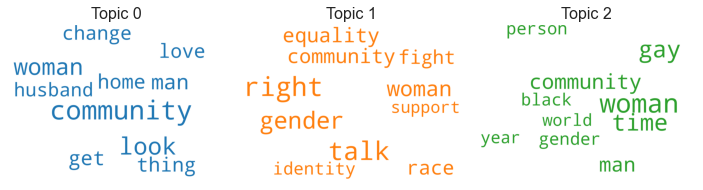

In [8]:
dfs = [df15_all, df16_all, df17_all, df18_all, df19_all, df20_all]
for i, df in enumerate(dfs):
    print("\n", i + 2015, "\n")
    # only consider words that we didn't provide and remove some other irrelevant words
    df_clean = df.quotation.apply(lambda x: remove_keywords(x))
    data_lemmatized = nlp_pipe(df_clean)
    corpus, id2word = create_corpus(data_lemmatized)
    p, c, lda_model = run_lda(data_lemmatized, corpus, id2word, 3)
    word_bubble(lda_model, 3)
    #view_word_counts(lda_model, data_lemmatized, 2)